# LAB 3A : Implement Simple Linear regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [22]:
dataset = pd.read_csv("house_prices_dataset.csv")

## EDA Steps

In [23]:
dataset.head()

,area,price
0,2231.88,558852.17
1,2524.92,632260.29
2,1527.65,382994.25
3,1986.09,497607.86
4,2920.16,730870.84


In [24]:
dataset.shape

(100, 2)

In [25]:
dataset.columns

Index(['area', 'price'], dtype='object')

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    100 non-null    float64
 1   price   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [27]:
dataset.describe()

,area,price
count,100.00000,100.000000
mean,2247.97960,562990.340700
std,453.86445,113464.467239
min,1522.16000,381657.070000
25%,1812.84750,454164.525000
50%,2284.15000,571887.305000
75%,2617.72750,655407.227500
max,2995.40000,749686.490000


## Preprocessing Steps

In [28]:
# Step 1 : Seprate i/p Independent Var and 
# o/p Dependent Var
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [29]:
print(X.head())

      area
0  2231.88
1  2524.92
2  1527.65
3  1986.09
4  2920.16


In [30]:
print(y.head())

0    558852.17
1    632260.29
2    382994.25
3    497607.86
4    730870.84
Name: price, dtype: float64


In [31]:
# Step 4 : Split data into training and testin
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X,y,
                                        test_size = 0.3,
                                        random_state = 0)

In [32]:
print(X_train.shape)
print(X_test.shape)

(70, 1)
(30, 1)


## Create the Regression model on training data

In [33]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
print("Intercept B0 = ",regressor.intercept_)
print("Coefficient B1= ",regressor.coef_)

Intercept B0 =  1024.0276497456944
Coefficient B1=  [249.98568049]


From Above values our model regression line equation

**y = 1024.0276497456944 + 249.98568049 * X**

By using this equation lets find Price of the area of 1600 sq ft

In [36]:
ynew = 1024.0276497456944 + 249.98568049 * 1600

print("Price of the area of 1600 sq ft = $",ynew)

Price of the area of 1600 sq ft = $ 401001.11643374566


In [37]:
ypred = regressor.predict(X_test)

In [38]:
print(ypred)
print(y_test)

[498508.03111231 382662.16691564 382914.65245293 381542.23106703
 540628.11841836 590880.23991081 706891.0946566  642999.75443653
 736234.41383272 587345.44238865 706251.13131454 418475.11550288
 382217.19240436 655299.04991672 416232.74394887 702028.87317104
 696134.21082504 655776.52256646 438643.96020495 491238.44752361
 454710.53989016 458047.84872472 497518.08781756 610279.12871697
 706533.6151335  605586.89749414 405388.36512914 731944.65955548
 564334.26049939 682824.97319566]
26    498600.70
86    382699.89
2     382994.25
55    381657.07
75    540545.30
93    590800.94
16    707043.03
73    642962.24
54    736186.75
95    587342.25
53    706192.99
92    418496.26
78    382039.32
13    655321.99
7     416215.31
30    702126.68
22    696107.64
24    655662.94
33    438450.54
8     491366.24
43    454636.69
62    458129.23
3     497607.86
71    610390.00
45    706724.21
48    605453.90
6     405289.18
99    732054.33
82    564535.09
76    682799.25
Name: price, dtype: float64


#### Accuracy of model

In [39]:
# 1. Training Accuracy

print("Training accuracy =",
      regressor.score(X_train,y_train))

Training accuracy = 0.9999989690300845


In [40]:
# 2. Testing Accuracy

print("Testing accuracy =",
      regressor.score(X_test,y_test))

Testing accuracy = 0.9999992625079123


### Visualizing the Model

#### 1. Visualize the training data

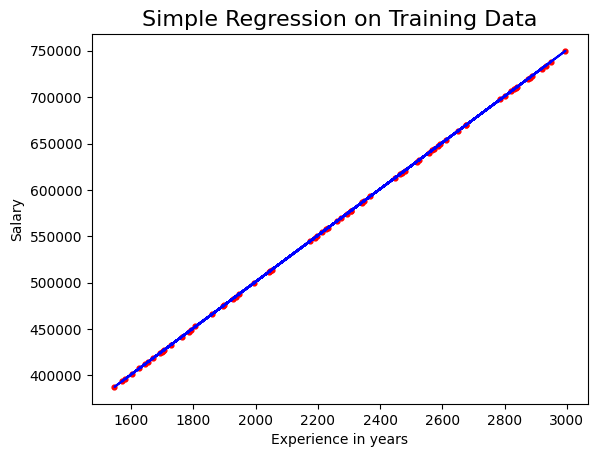

In [41]:
plt.scatter(X_train,y_train,color = 'red', s= 12)
plt.plot(X_train, regressor.predict(X_train),
        color = 'blue')
plt.title("Simple Regression on Training Data", size= 16)
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.show()

#### 2. Visualize the testing data

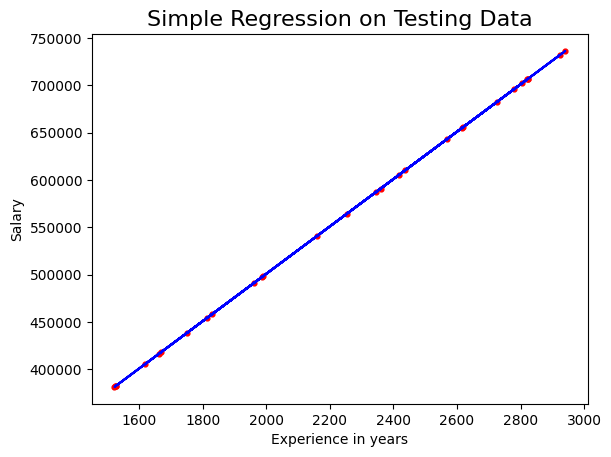

In [42]:
plt.scatter(X_test,y_test,color = 'red', s= 12)
plt.plot(X_test, regressor.predict(X_test),
        color = 'blue')
plt.title("Simple Regression on Testing Data", size= 16)
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.show()

#### Find R^2 Score of model

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9999992625079123

In [44]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_train, regressor.predict(X_train))

np.float64(88.2605597897782)

median_absolute_error(y_test, regressor.predict(X_test))